<a href="https://colab.research.google.com/github/mdatta17/Work/blob/master/Prediction_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

EDA

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [6]:
df = pd.read_csv("/content/gdrive/My Drive/heart.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


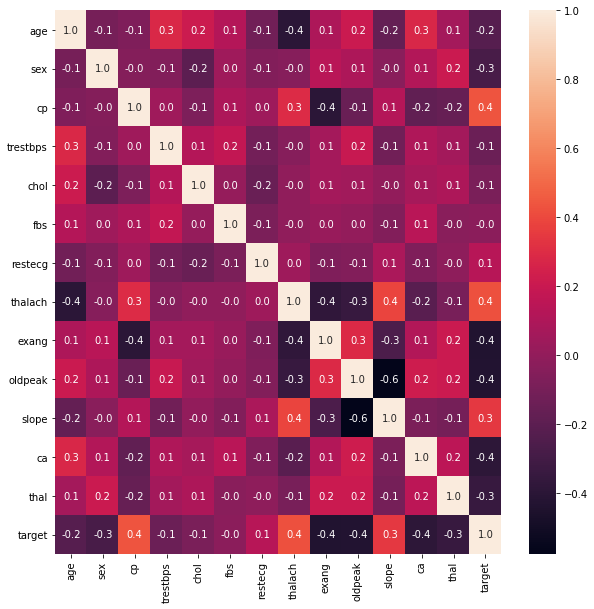

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

Analysis of age

In [38]:
df.age.value_counts()[:20]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
Name: age, dtype: int64

<function matplotlib.pyplot.show>

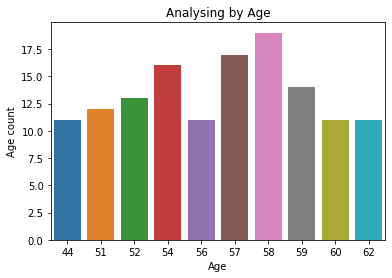

In [39]:
sns.barplot(x= df.age.value_counts()[:10].index, y= df.age.value_counts()[:10].values  )
plt.xlabel('Age')
plt.ylabel("Age count")
plt.title("Analysing by Age")
plt.show

In [13]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [14]:
count_NoDisease = len(df[df.target == 0])
count_Disease = len(df[df.target == 1])
print("Percentage of patients who don`t have heart disease: {:.2f}%".format((count_NoDisease/(len(df.target)))*100))
print("Percentage of patients who have heart disease: {:.2f}%".format((count_Disease/(len(df.target)))*100))

Percentage of patients who don`t have heart disease: 45.54%
Percentage of patients who have heart disease: 54.46%


In [16]:
count_Female= len(df[df.sex == 0])
count_Male = len(df[df.sex == 1])
print("Perentage of Female Patients: {:.2f}%".format((count_Female/(len(df.sex))*100)))
print("Percentage of male Patients: {:.2f}%".format((count_Male/(len(df.sex))*100)))

Perentage of Female Patients: 31.68%
Percentage of male Patients: 68.32%


In [18]:
young_age = df[(df.age>=29)&(df.age<40)]
middle_age = df[(df.age>=40)&(df.age<55)]
old_age = df[(df.age>=55)]
print("young ages", len(young_age))
print("middle ages", len(middle_age))
print("old ages", len(old_age))

young ages 16
middle ages 128
old ages 159


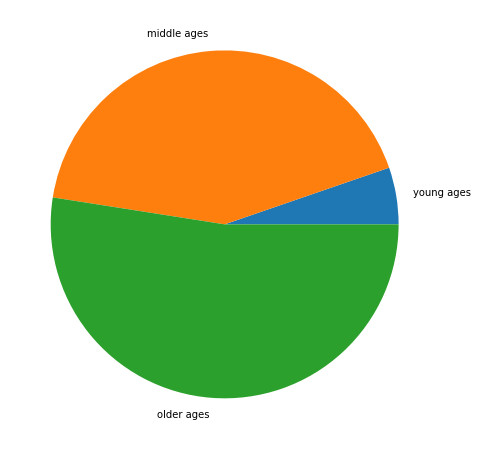

In [19]:
colors = ['yellow','blue', 'green']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(young_age), len(middle_age), len(older_age)], labels=['young ages', 'middle ages', 'older ages'])
plt.show()

Chest pain analysis

In [20]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [21]:
df.target.unique()

array([1, 0])

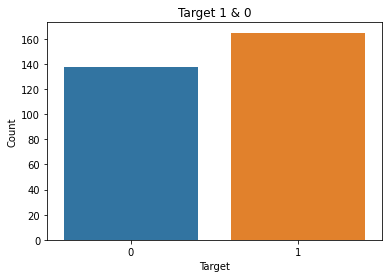

In [22]:
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target 1 & 0')
plt.show()

In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Building the model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.linear_model import LogisticRegression
X_data = df.drop(['target'], axis = 1)
y = df.target.values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.2, random_state=123 )

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Accuracy of Logistic Regression model is {:.2f}%'.format(lr.score(X_test, y_test)*100))

Accuracy of Logistic Regression model is 77.05%


KNN model

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print("Accuracy of KNN model: {:.2f}%".format(knn.score(X_test, y_test)*100))

Accuracy of KNN model: 62.30%


SVM model

In [35]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
print("Accuracy of KNN model: {:.2f}%".format(svm.score(X_test, y_test)*100))

Accuracy of KNN model: 65.57%


Naive Bayes model

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Accuracy of Naive Bayes model: {:.2f}%".format(nb.score(X_test, y_test)*100))

Accuracy of Naive Bayes model: 83.61%


Random Forest model

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state= 1)
rf.fit(X_train, y_train)
print("Accuracy of Random Forest model: {:.2f}%".format(rf.score(X_test, y_test)*100))

Accuracy of Random Forest model: 75.41%
